In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# New Section

In [6]:
df=pd.read_csv("CarClaim.csv")
df.head()

,claim_number,age_of_driver,gender,marital_status,safty_rating,annual_income,high_education_ind,address_change_ind,living_status,zip_code,...,liab_prct,channel,policy_report_filed_ind,claim_est_payout,age_of_vehicle,vehicle_category,vehicle_price,vehicle_color,vehicle_weight,fraud
0,1,46,M,1.0,85,38301,1,1,Rent,80006,...,74,Broker,0,7530.940993,9.0,Compact,12885.45235,white,16161.33381,0
1,3,21,F,0.0,75,30445,0,1,Rent,15021,...,79,Online,0,2966.024895,4.0,Large,29429.45218,white,28691.96422,0
2,4,49,F,0.0,87,38923,0,1,Own,20158,...,0,Broker,0,6283.888333,3.0,Compact,21701.18195,white,22090.94758,1
3,5,58,F,1.0,58,40605,1,0,Own,15024,...,99,Broker,1,6169.747994,4.0,Medium,13198.27344,other,38329.58106,1
4,6,38,M,1.0,95,36380,1,0,Rent,50034,...,7,Broker,0,4541.387150,7.0,Medium,38060.21122,gray,25876.56319,0


# Data Preprocessing Part 1


In [7]:
#Remove identifier column
df=df.drop(["claim_number","zip_code"],axis=1)
df.head()

,age_of_driver,gender,marital_status,safty_rating,annual_income,high_education_ind,address_change_ind,living_status,claim_date,claim_day_of_week,...,liab_prct,channel,policy_report_filed_ind,claim_est_payout,age_of_vehicle,vehicle_category,vehicle_price,vehicle_color,vehicle_weight,fraud
0,46,M,1.0,85,38301,1,1,Rent,12/16/2016,Friday,...,74,Broker,0,7530.940993,9.0,Compact,12885.45235,white,16161.33381,0
1,21,F,0.0,75,30445,0,1,Rent,02-12-2015,Thursday,...,79,Online,0,2966.024895,4.0,Large,29429.45218,white,28691.96422,0
2,49,F,0.0,87,38923,0,1,Own,12-06-2016,Tuesday,...,0,Broker,0,6283.888333,3.0,Compact,21701.18195,white,22090.94758,1
3,58,F,1.0,58,40605,1,0,Own,05-05-2016,Thursday,...,99,Broker,1,6169.747994,4.0,Medium,13198.27344,other,38329.58106,1
4,38,M,1.0,95,36380,1,0,Rent,10/27/2015,Tuesday,...,7,Broker,0,4541.387150,7.0,Medium,38060.21122,gray,25876.56319,0


In [8]:
#Check the number of unique value
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17998 entries, 0 to 17997
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age_of_driver            17998 non-null  int64  
 1   gender                   17998 non-null  object 
 2   marital_status           17993 non-null  float64
 3   safty_rating             17998 non-null  int64  
 4   annual_income            17998 non-null  int64  
 5   high_education_ind       17998 non-null  int64  
 6   address_change_ind       17998 non-null  int64  
 7   living_status            17998 non-null  object 
 8   claim_date               17998 non-null  object 
 9   claim_day_of_week        17998 non-null  object 
 10  accident_site            17998 non-null  object 
 11  past_num_of_claims       17998 non-null  int64  
 12  witness_present_ind      17866 non-null  float64
 13  liab_prct                17998 non-null  int64  
 14  channel               

In [9]:
df.select_dtypes("object").nunique()

gender                 2
living_status          2
claim_date           731
claim_day_of_week      7
accident_site          3
channel                3
vehicle_category       3
vehicle_color          7
dtype: int64

In [10]:
#extract year on clain-date
df["claim_date"]=df["claim_date"].str[6:].astype(int)
df.head()

,age_of_driver,gender,marital_status,safty_rating,annual_income,high_education_ind,address_change_ind,living_status,claim_date,claim_day_of_week,...,liab_prct,channel,policy_report_filed_ind,claim_est_payout,age_of_vehicle,vehicle_category,vehicle_price,vehicle_color,vehicle_weight,fraud
0,46,M,1.0,85,38301,1,1,Rent,2016,Friday,...,74,Broker,0,7530.940993,9.0,Compact,12885.45235,white,16161.33381,0
1,21,F,0.0,75,30445,0,1,Rent,2015,Thursday,...,79,Online,0,2966.024895,4.0,Large,29429.45218,white,28691.96422,0
2,49,F,0.0,87,38923,0,1,Own,2016,Tuesday,...,0,Broker,0,6283.888333,3.0,Compact,21701.18195,white,22090.94758,1
3,58,F,1.0,58,40605,1,0,Own,2016,Thursday,...,99,Broker,1,6169.747994,4.0,Medium,13198.27344,other,38329.58106,1
4,38,M,1.0,95,36380,1,0,Rent,2015,Tuesday,...,7,Broker,0,4541.387150,7.0,Medium,38060.21122,gray,25876.56319,0


In [11]:
#Again checking the numbr of unique value from all the object datatype
df.select_dtypes(include="object").nunique()

gender               2
living_status        2
claim_day_of_week    7
accident_site        3
channel              3
vehicle_category     3
vehicle_color        7
dtype: int64

In [12]:
#Replace 1 with "yes" and 0 with "no" in the categorical column
df["fraud"]=df["fraud"].replace({0:"no",1:"yes"})
df["high_education_ind"]=df["high_education_ind"].replace({0:"no",1:"yes"})
df["marital_status"]=df["marital_status"].replace({0:"no",1:"yes"})
df["address_change_ind"]=df["address_change_ind"].replace({0:"no",1:"yes"})
df["policy_report_filed_ind"]=df["policy_report_filed_ind"].replace({0:"no",1:"yes"})
df["witness_present_ind"]=df["witness_present_ind"].replace({0:"no",1:"yes"})


In [13]:
df.head()

,age_of_driver,gender,marital_status,safty_rating,annual_income,high_education_ind,address_change_ind,living_status,claim_date,claim_day_of_week,...,liab_prct,channel,policy_report_filed_ind,claim_est_payout,age_of_vehicle,vehicle_category,vehicle_price,vehicle_color,vehicle_weight,fraud
0,46,M,yes,85,38301,yes,yes,Rent,2016,Friday,...,74,Broker,no,7530.940993,9.0,Compact,12885.45235,white,16161.33381,no
1,21,F,no,75,30445,no,yes,Rent,2015,Thursday,...,79,Online,no,2966.024895,4.0,Large,29429.45218,white,28691.96422,no
2,49,F,no,87,38923,no,yes,Own,2016,Tuesday,...,0,Broker,no,6283.888333,3.0,Compact,21701.18195,white,22090.94758,yes
3,58,F,yes,58,40605,yes,no,Own,2016,Thursday,...,99,Broker,yes,6169.747994,4.0,Medium,13198.27344,other,38329.58106,yes
4,38,M,yes,95,36380,yes,no,Rent,2015,Tuesday,...,7,Broker,no,4541.387150,7.0,Medium,38060.21122,gray,25876.56319,no


# Exploratory Data Analysis

In [14]:
#Get the names of all the columns with data type "object"
categorical=df.select_dtypes(include="object").columns.tolist()
categorical


['gender',
 'marital_status',
 'high_education_ind',
 'address_change_ind',
 'living_status',
 'claim_day_of_week',
 'accident_site',
 'witness_present_ind',
 'channel',
 'policy_report_filed_ind',
 'vehicle_category',
 'vehicle_color',
 'fraud']

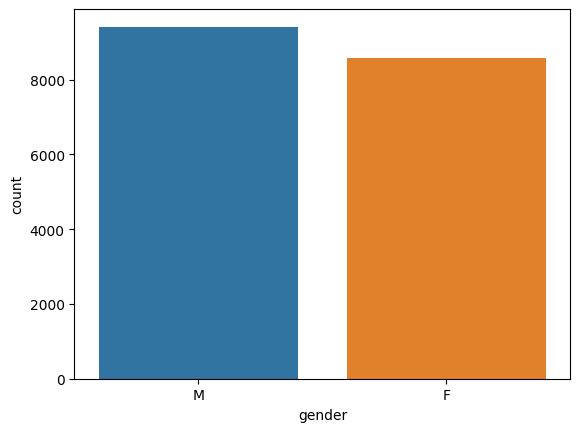

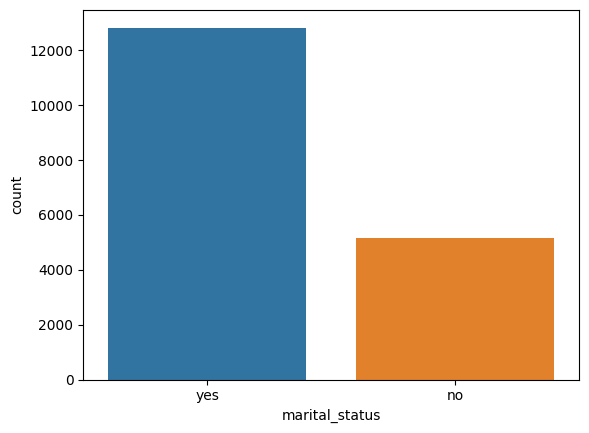

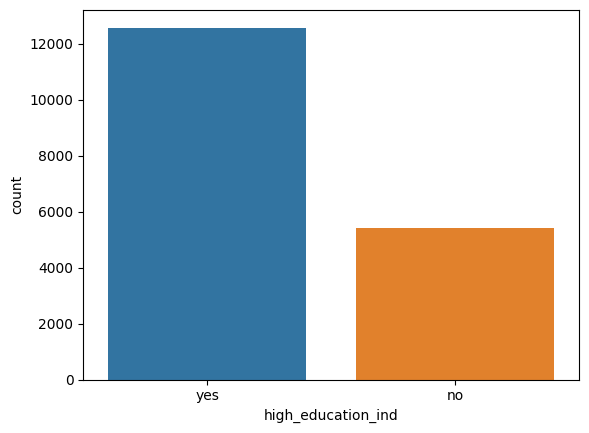

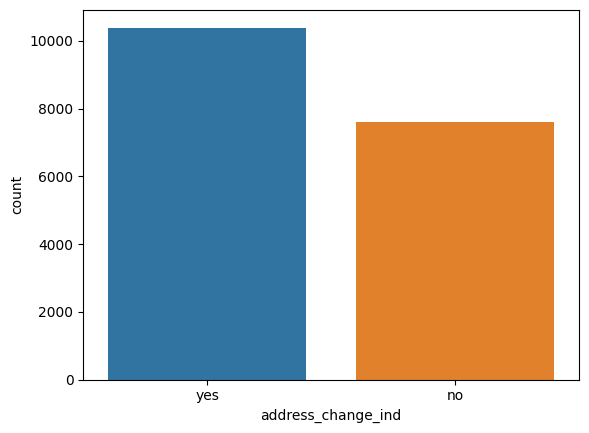

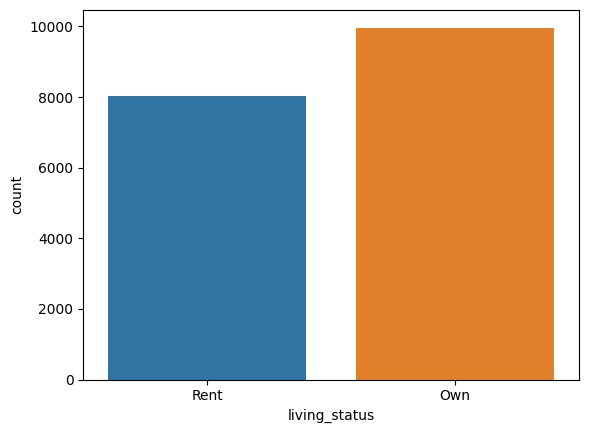

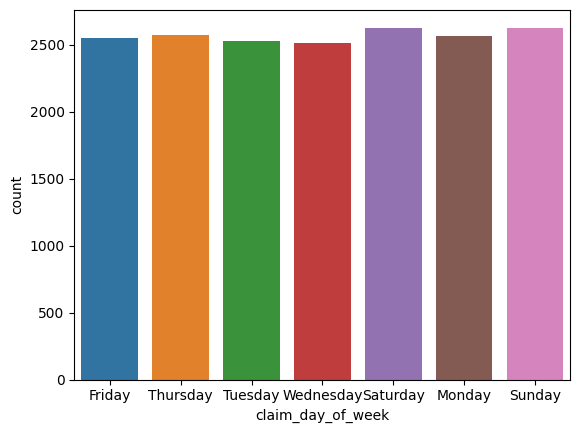

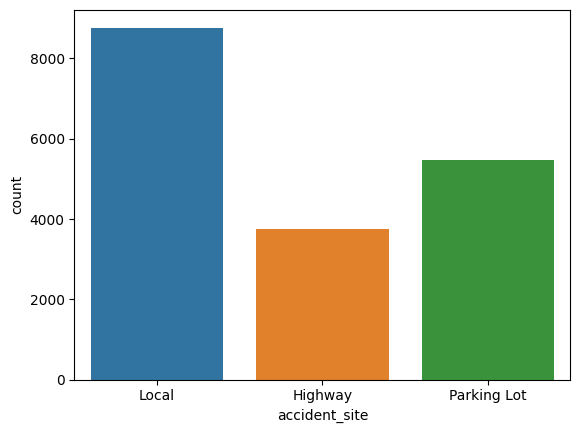

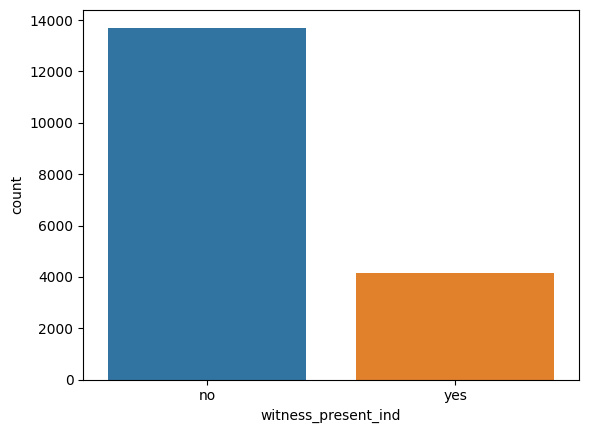

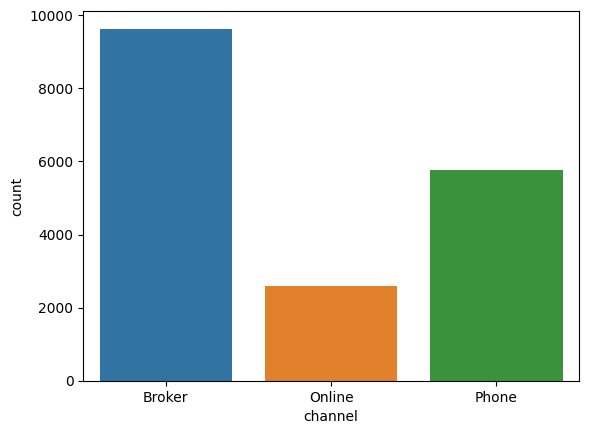

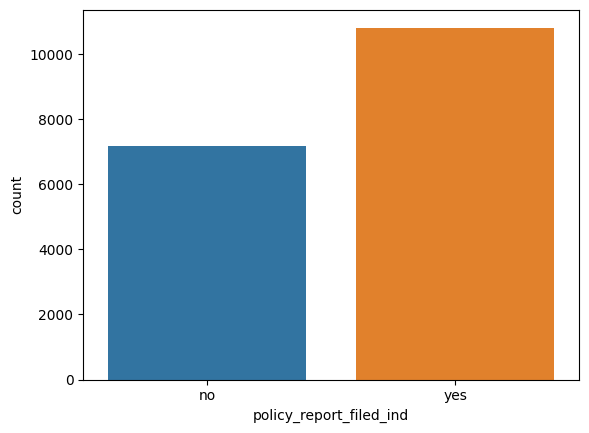

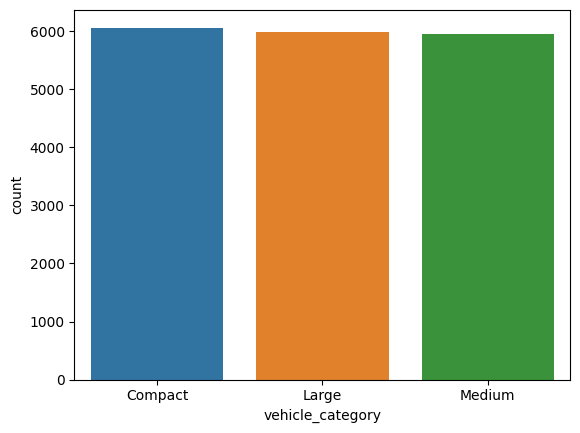

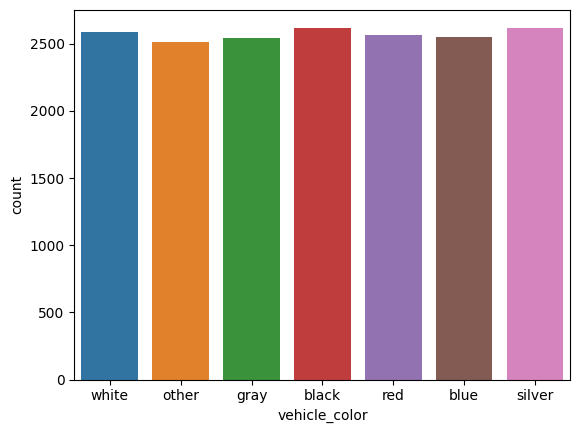

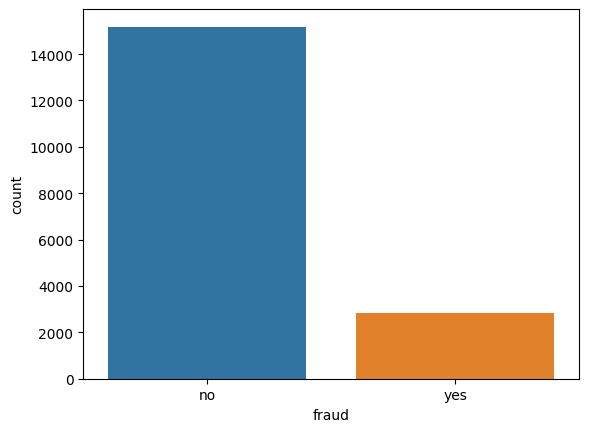

In [15]:
#Create a countplot for each categorical variable using seaborn
for i in categorical:
  sns.countplot(x=i,data=df)

  plt.show()


In [16]:
#Get the names of all the columns with data type "int"
numerical=df.select_dtypes(["int","float"]).columns.tolist()
numerical

['age_of_driver',
 'safty_rating',
 'annual_income',
 'claim_date',
 'past_num_of_claims',
 'liab_prct',
 'claim_est_payout',
 'age_of_vehicle',
 'vehicle_price',
 'vehicle_weight']

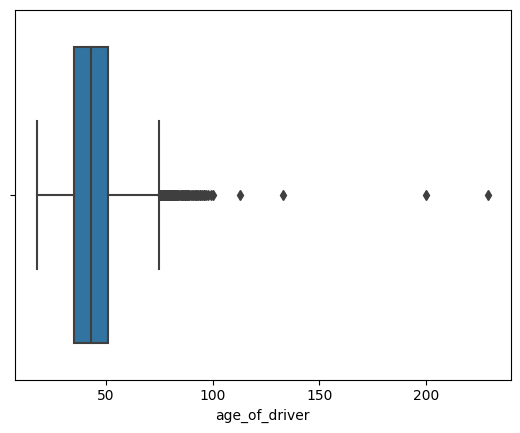

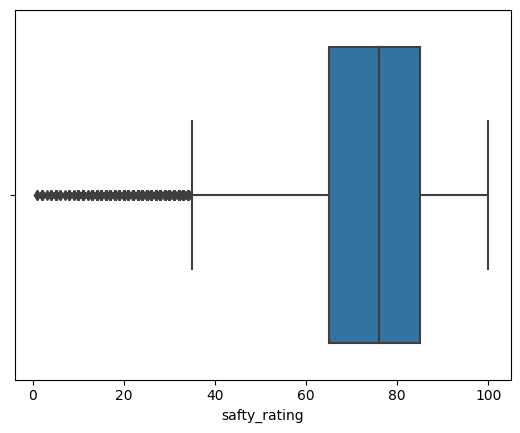

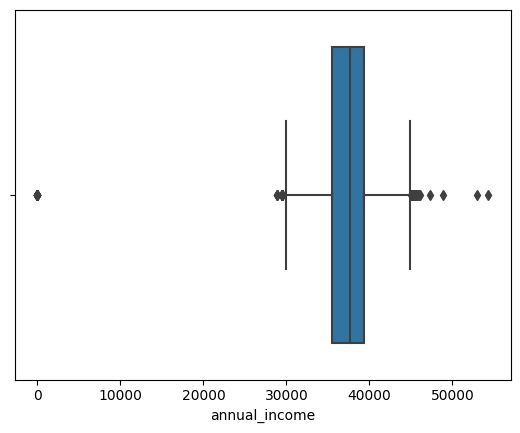

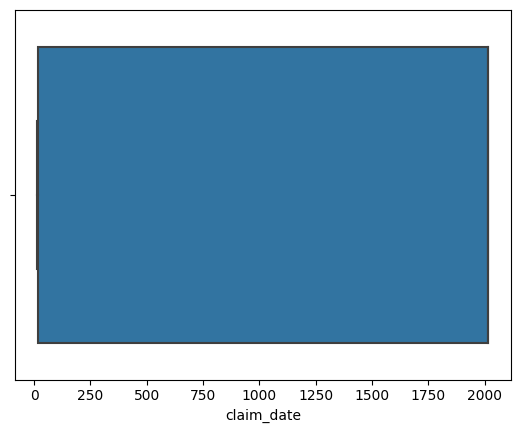

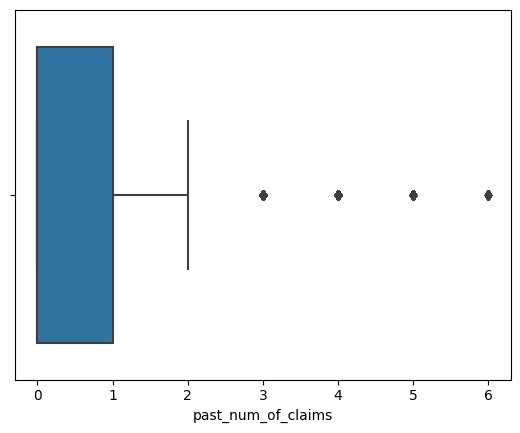

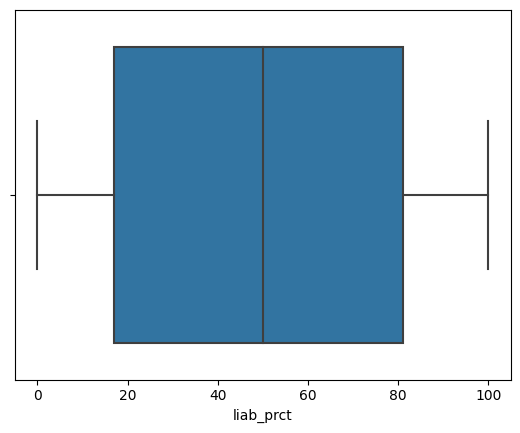

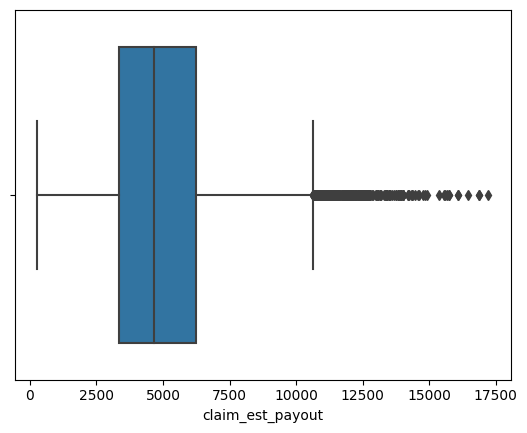

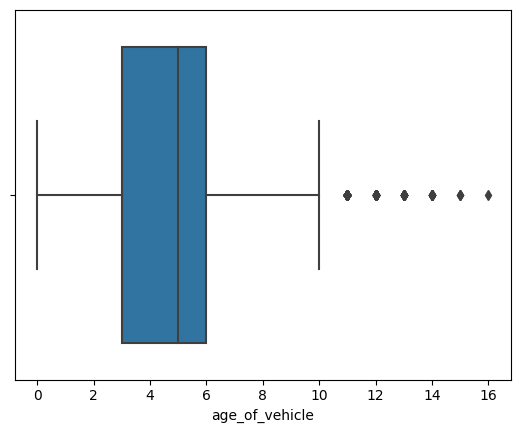

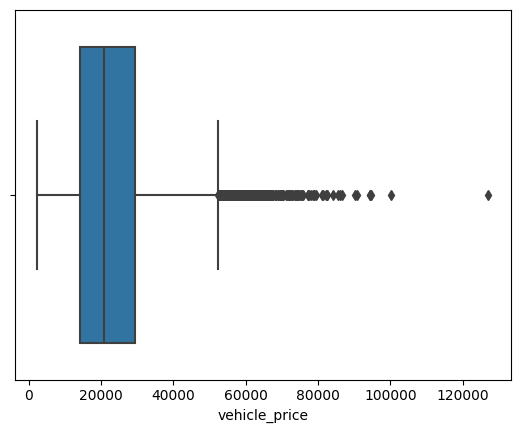

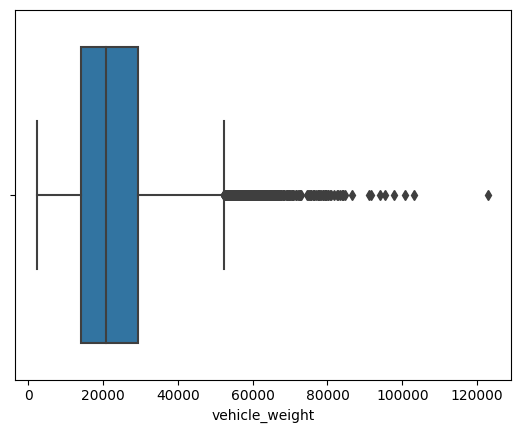

In [17]:
#Creating a box plot
for i in numerical:
  sns.boxplot(x=i,data=df)
  plt.show()

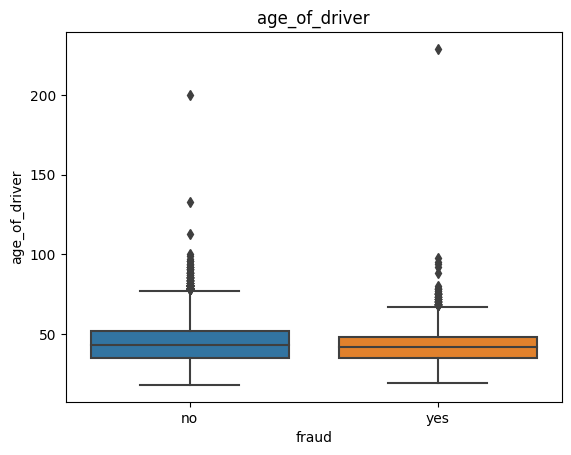

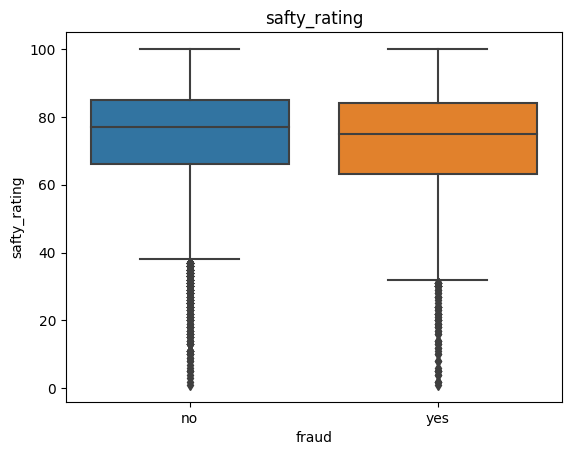

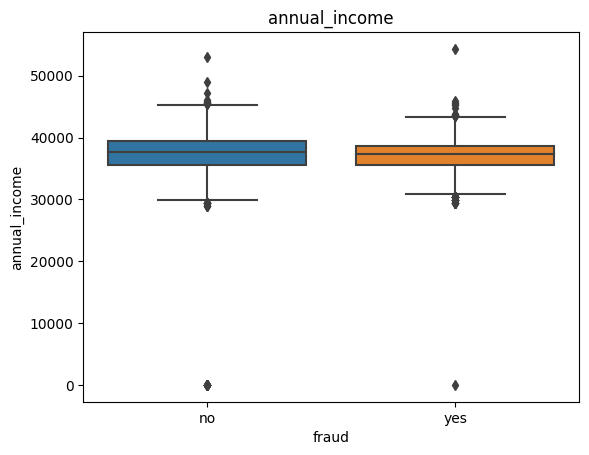

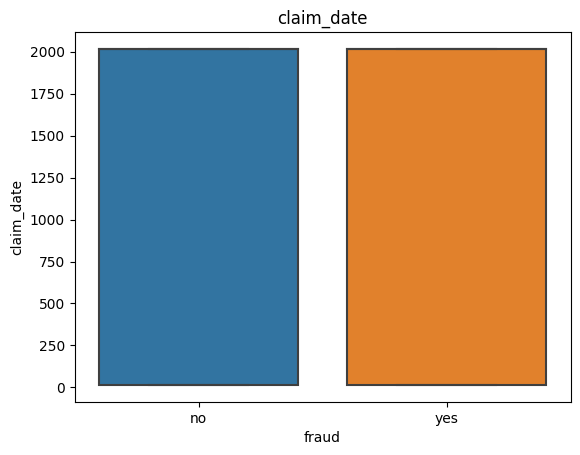

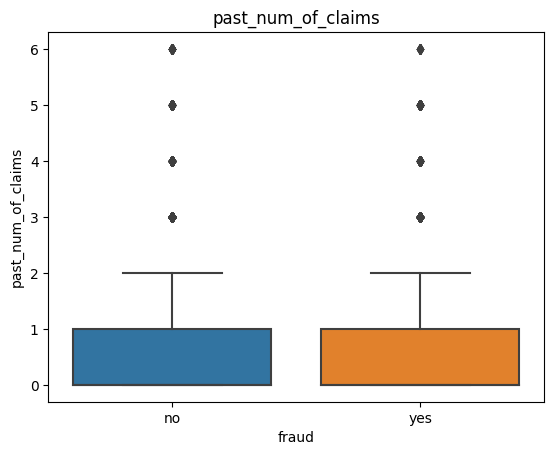

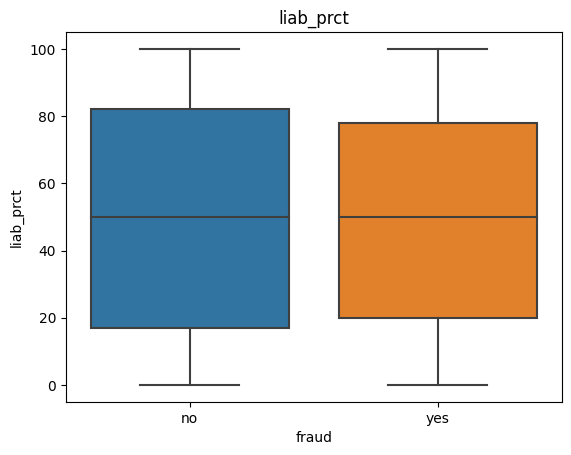

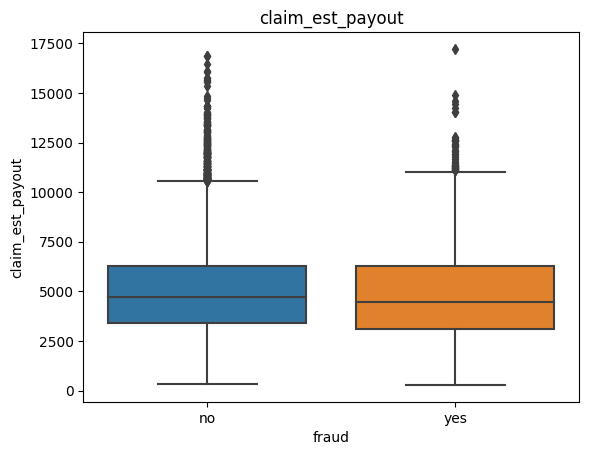

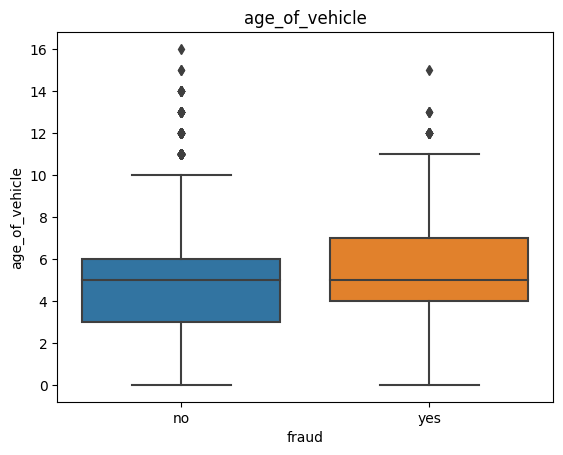

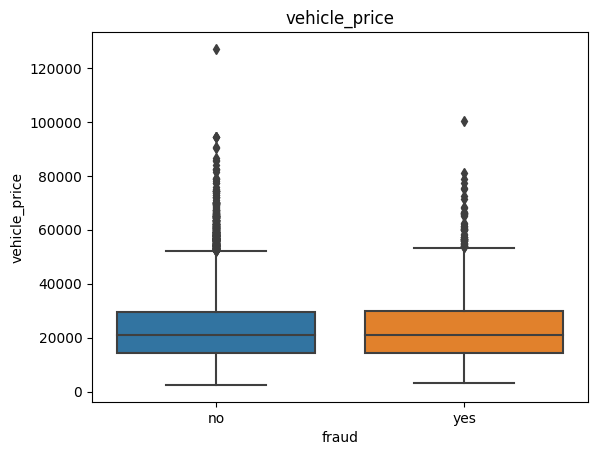

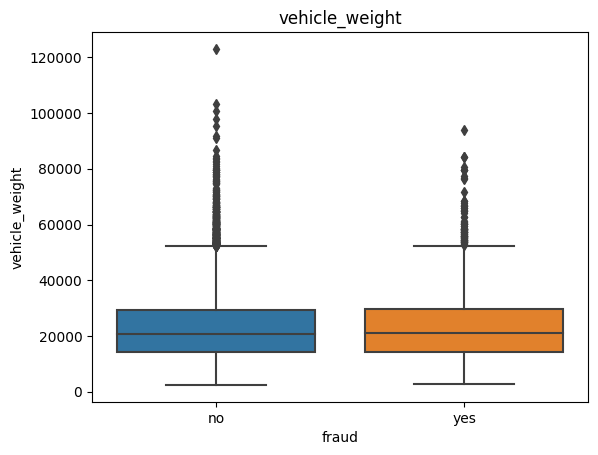

In [18]:
for i in numerical:
  sns.boxplot(y=i,x="fraud",data=df)
  plt.title(i)
  plt.show()

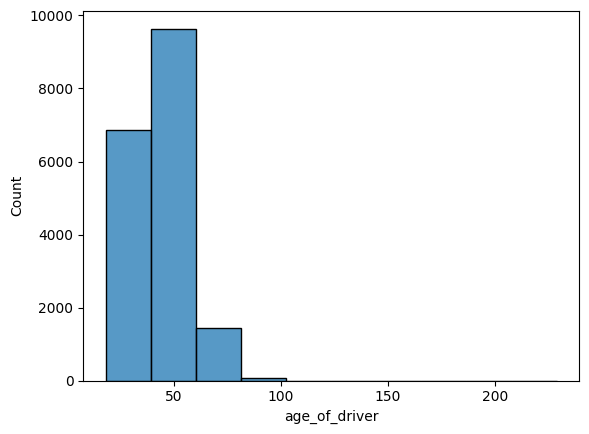

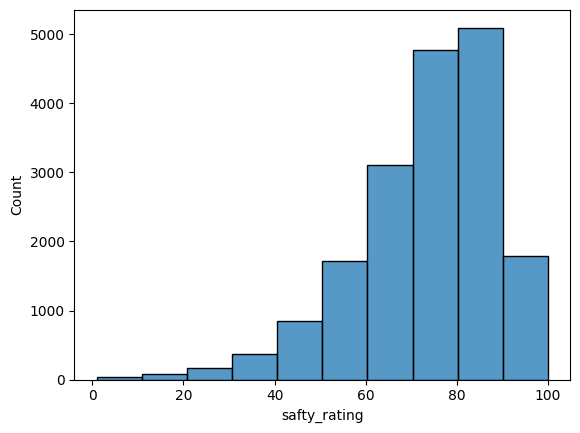

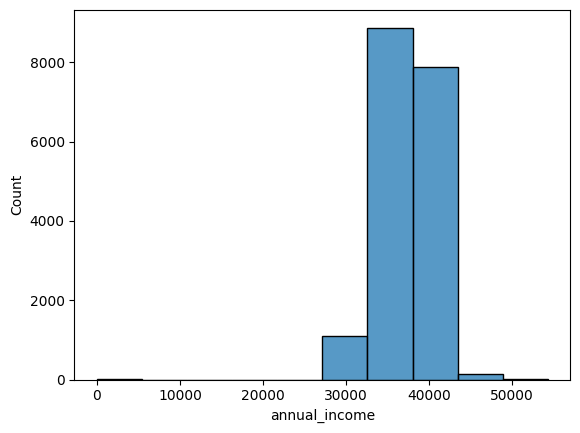

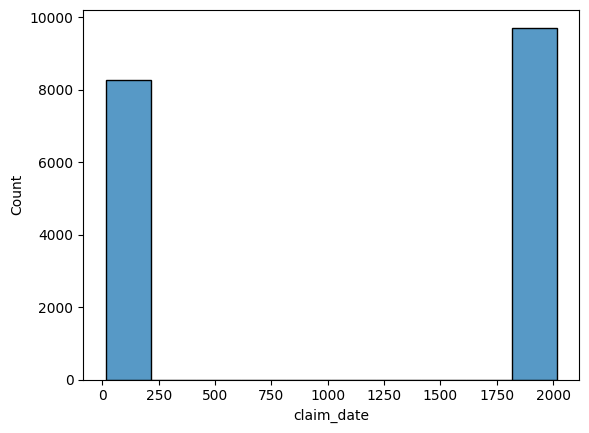

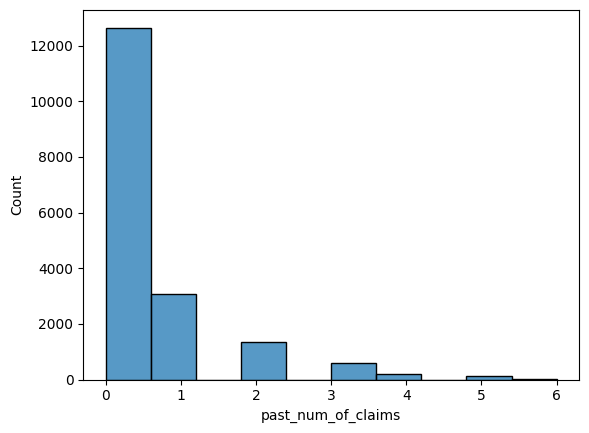

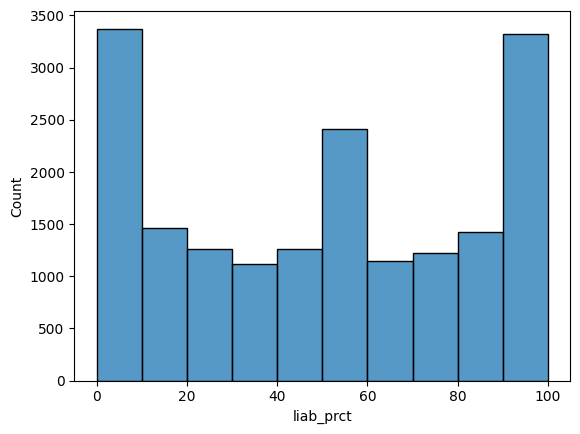

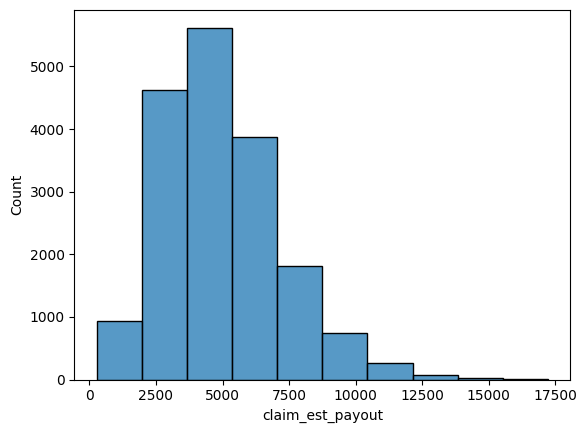

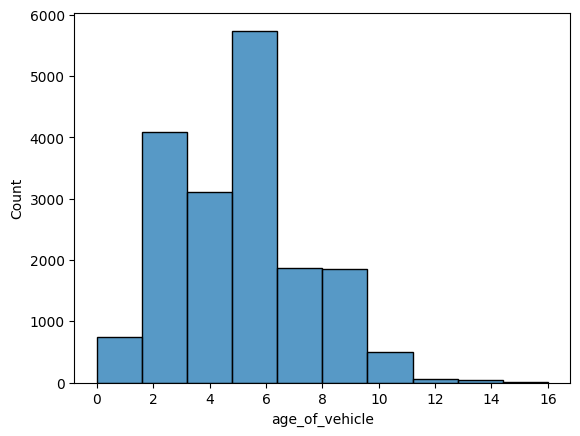

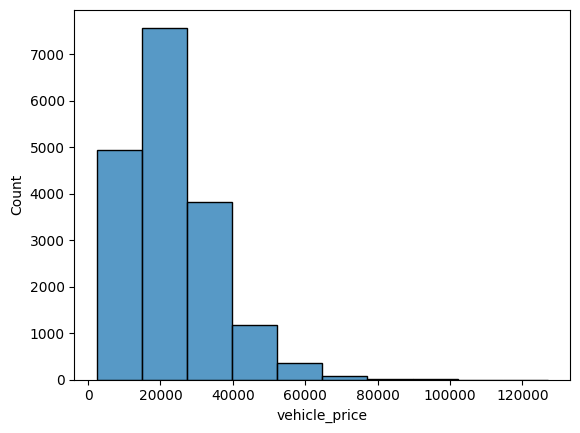

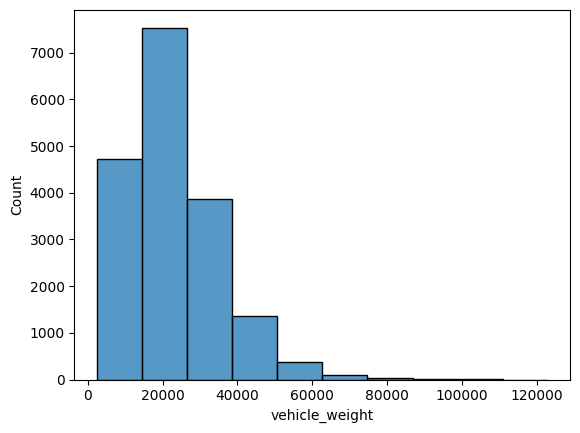

In [19]:
#Create a histogram for each integer variable
for i in numerical:
  sns.histplot(df[i],bins=10)
  plt.show()

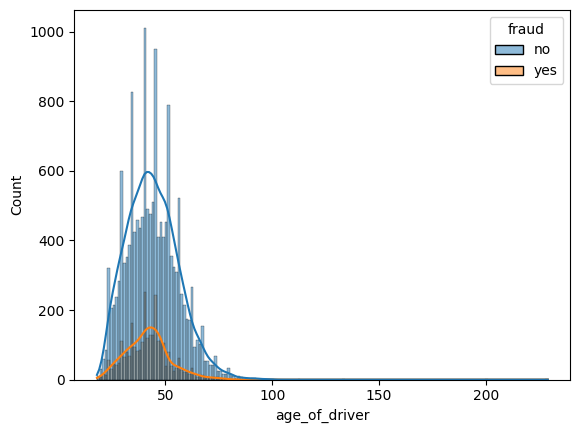

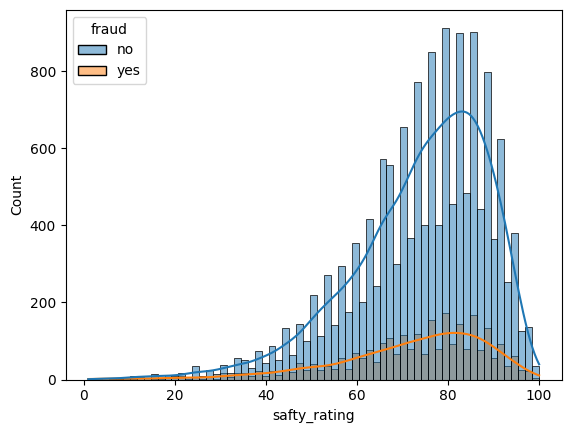

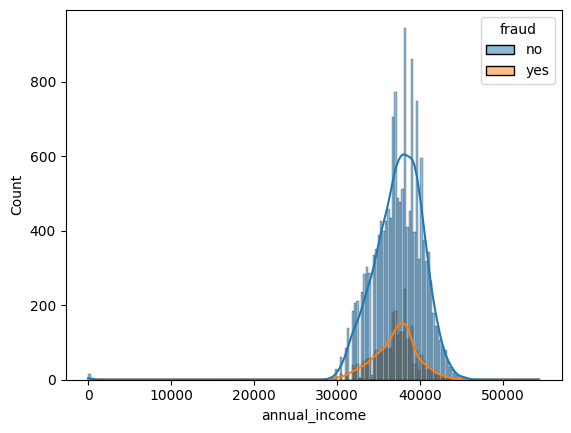

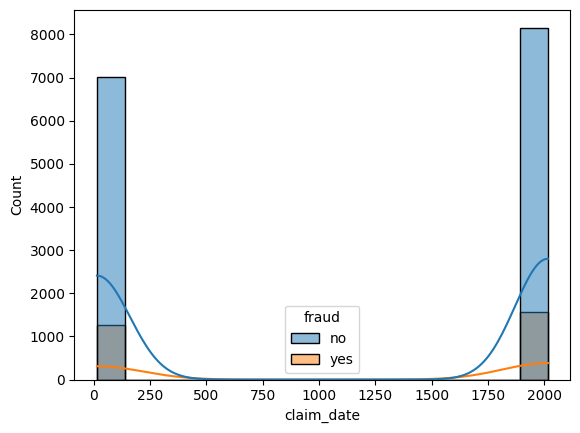

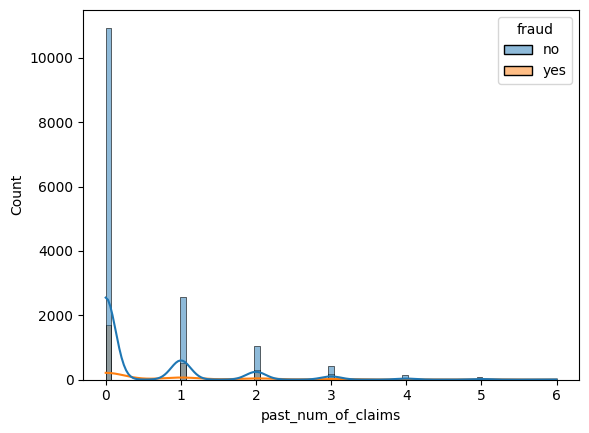

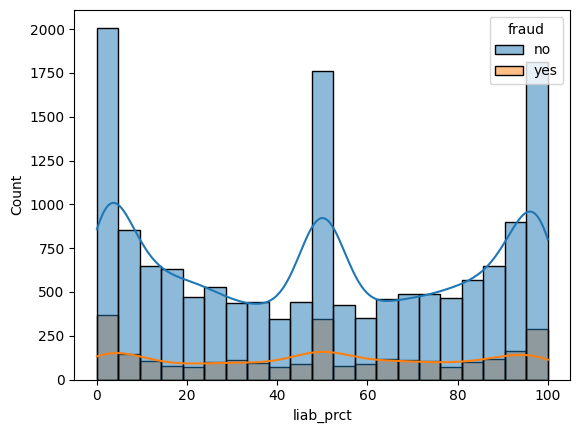

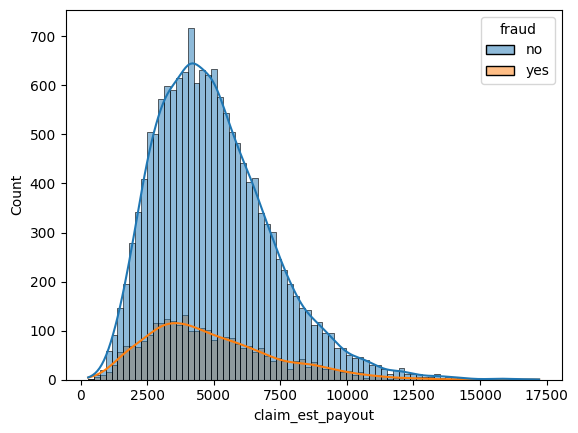

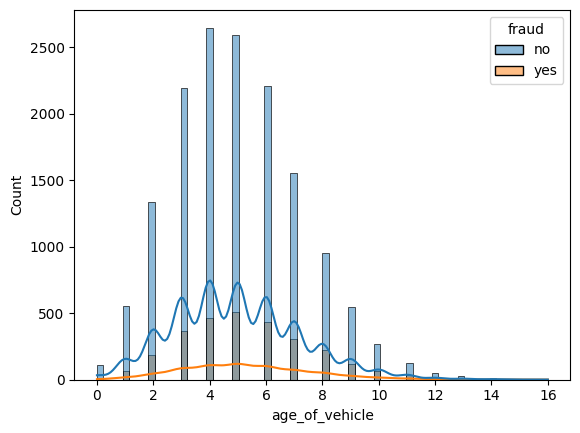

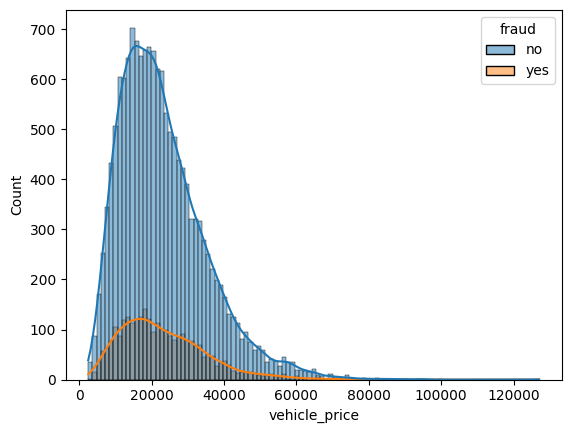

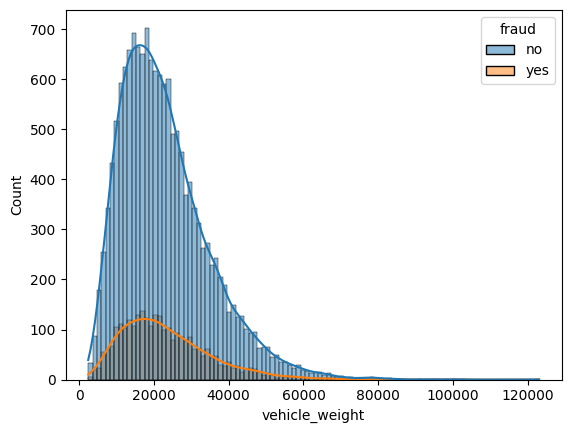

In [20]:
#Create a histogram for each integer variable with hue ="Attrition"
for i in numerical:
  sns.histplot(x=i,data=df,hue="fraud",kde=True)
  plt.show()

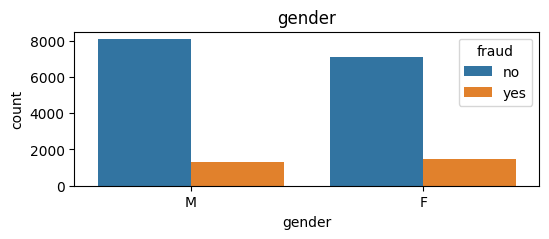

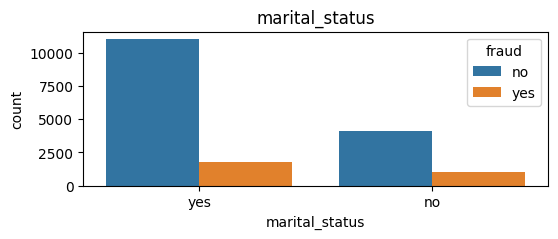

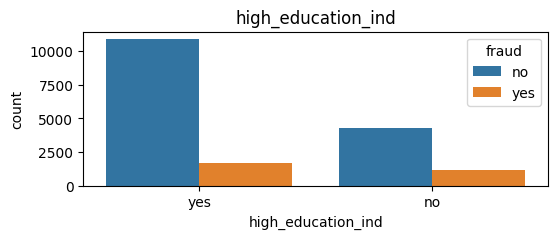

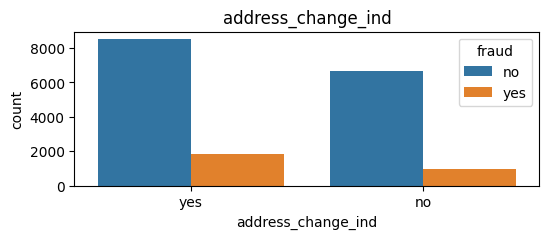

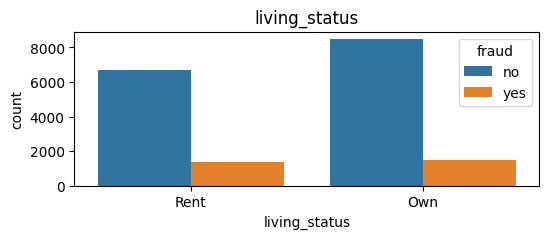

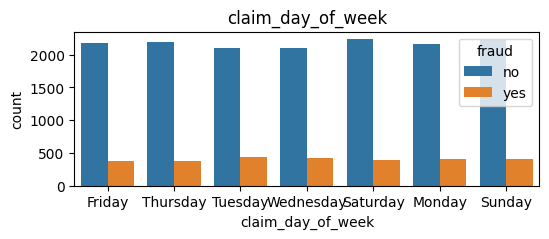

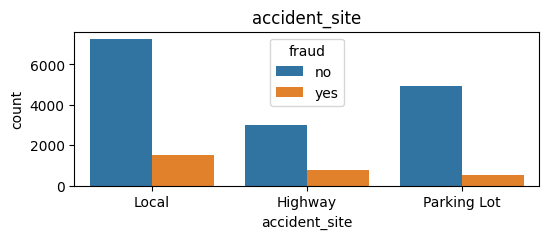

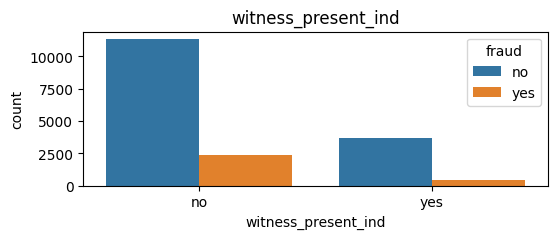

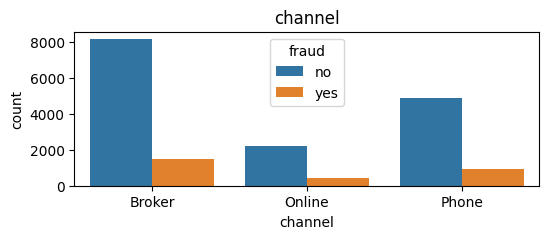

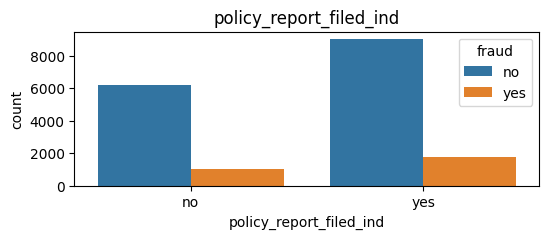

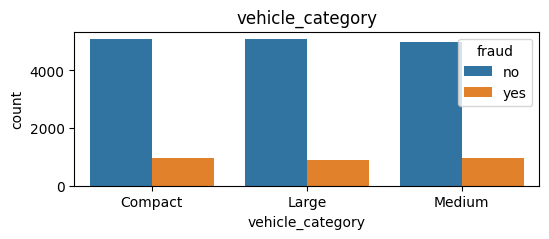

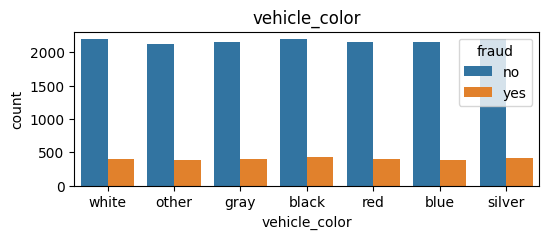

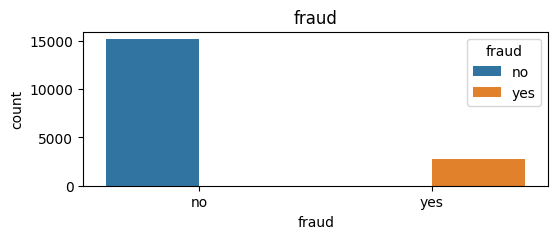

In [21]:
#Creating a countplot for each categorical variable
for i in categorical:
  plt.figure(figsize=(6,2))
  sns.countplot(x=i,data=df,hue="fraud")
  plt.title(i)
  plt.show()

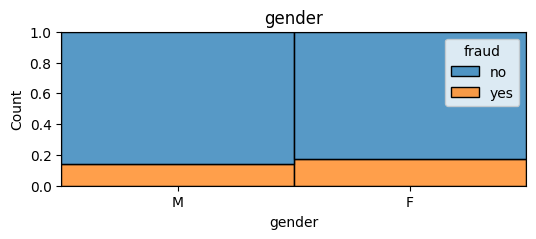

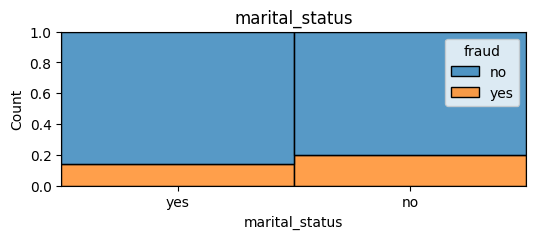

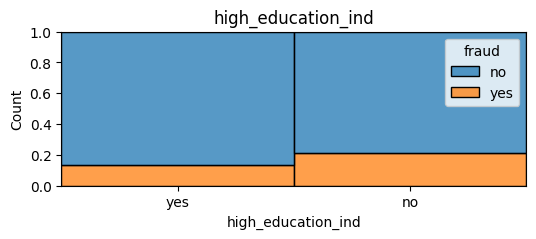

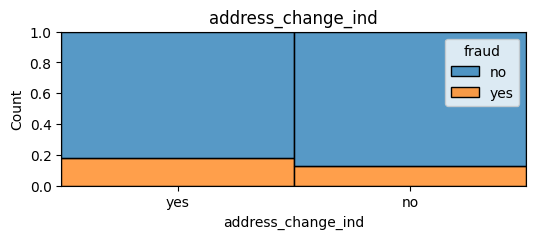

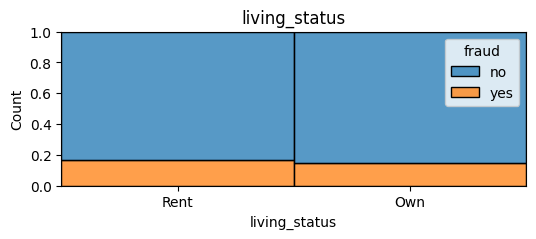

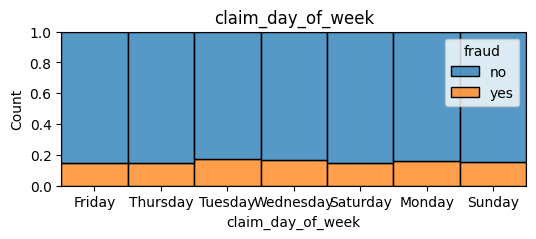

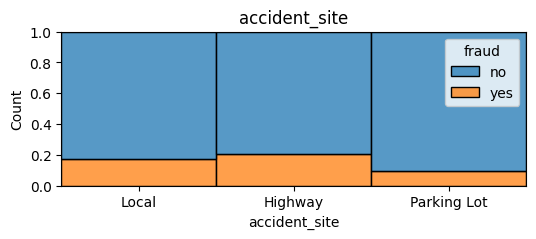

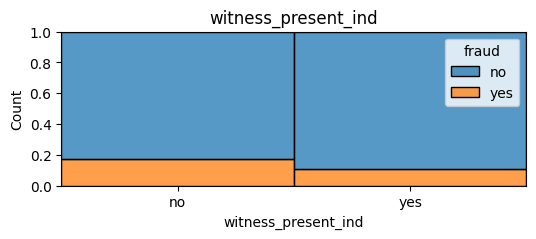

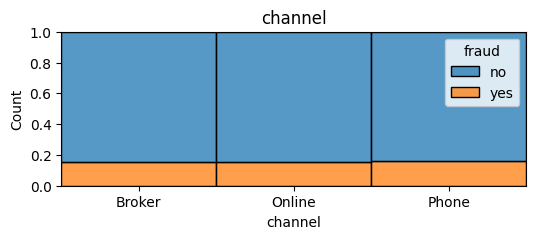

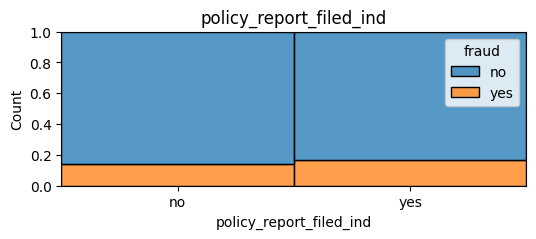

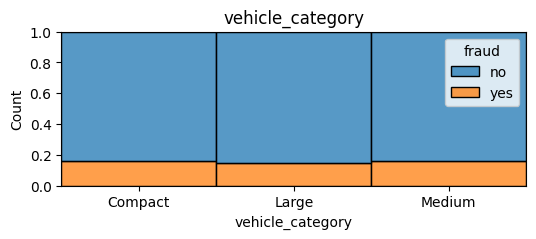

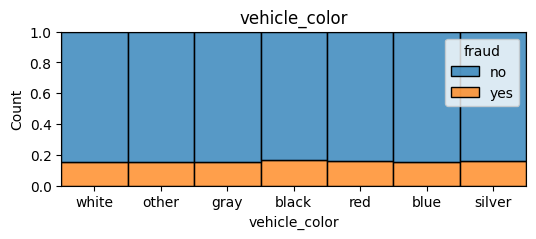

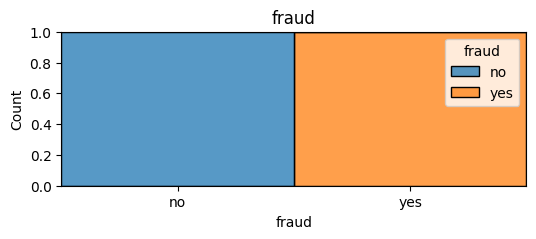

In [22]:
#Creating a Density Plot for categorical values
for i in categorical:
  plt.figure(figsize=(6,2))
  sns.histplot(x=i,data=df,hue="fraud",kde=False,multiple="fill")
  plt.title(i)
  plt.show()

# Data PreProcessing Part 2

In [23]:
#Check the amount of missing values
check_missing=df.isnull().sum()*100/df.shape[0]
check_missing[check_missing>0].sort_values(ascending=False)

witness_present_ind    0.733415
claim_est_payout       0.094455
age_of_vehicle         0.044449
marital_status         0.027781
dtype: float64

In [24]:
df.shape[0]

17998

In [25]:
#Drop all the null value because the amount of null value is very small
df.dropna(inplace=True)
df.shape

(17836, 23)

# Label Encoding for object data types

In [26]:
for i in categorical:
  print(i,df[i].unique())#Print the column name and the unique values.....

gender ['M' 'F']
marital_status ['yes' 'no']
high_education_ind ['yes' 'no']
address_change_ind ['yes' 'no']
living_status ['Rent' 'Own']
claim_day_of_week ['Friday' 'Thursday' 'Tuesday' 'Wednesday' 'Saturday' 'Monday' 'Sunday']
accident_site ['Local' 'Highway' 'Parking Lot']
witness_present_ind ['no' 'yes']
channel ['Broker' 'Online' 'Phone']
policy_report_filed_ind ['no' 'yes']
vehicle_category ['Compact' 'Large' 'Medium']
vehicle_color ['white' 'other' 'gray' 'black' 'red' 'blue' 'silver']
fraud ['no' 'yes']


In [27]:
from sklearn import preprocessing

#Loop over each column in the DataFrame where dtpe="object"
for col in categorical:
#Initialize a labelEncoder object
     label_encoder=preprocessing.LabelEncoder()

#Fit the encoder to the unique values
     label_encoder.fit(df[col].unique())

#Transform the column using the encoder
     df[col]=label_encoder.transform(df[col])

     #Print the encoded values
     print(col,df[col].unique())

gender [1 0]
marital_status [1 0]
high_education_ind [1 0]
address_change_ind [1 0]
living_status [1 0]
claim_day_of_week [0 4 5 6 2 1 3]
accident_site [1 0 2]
witness_present_ind [0 1]
channel [0 1 2]
policy_report_filed_ind [0 1]
vehicle_category [0 1 2]
vehicle_color [6 3 2 0 4 1 5]
fraud [0 1]


<Axes: >

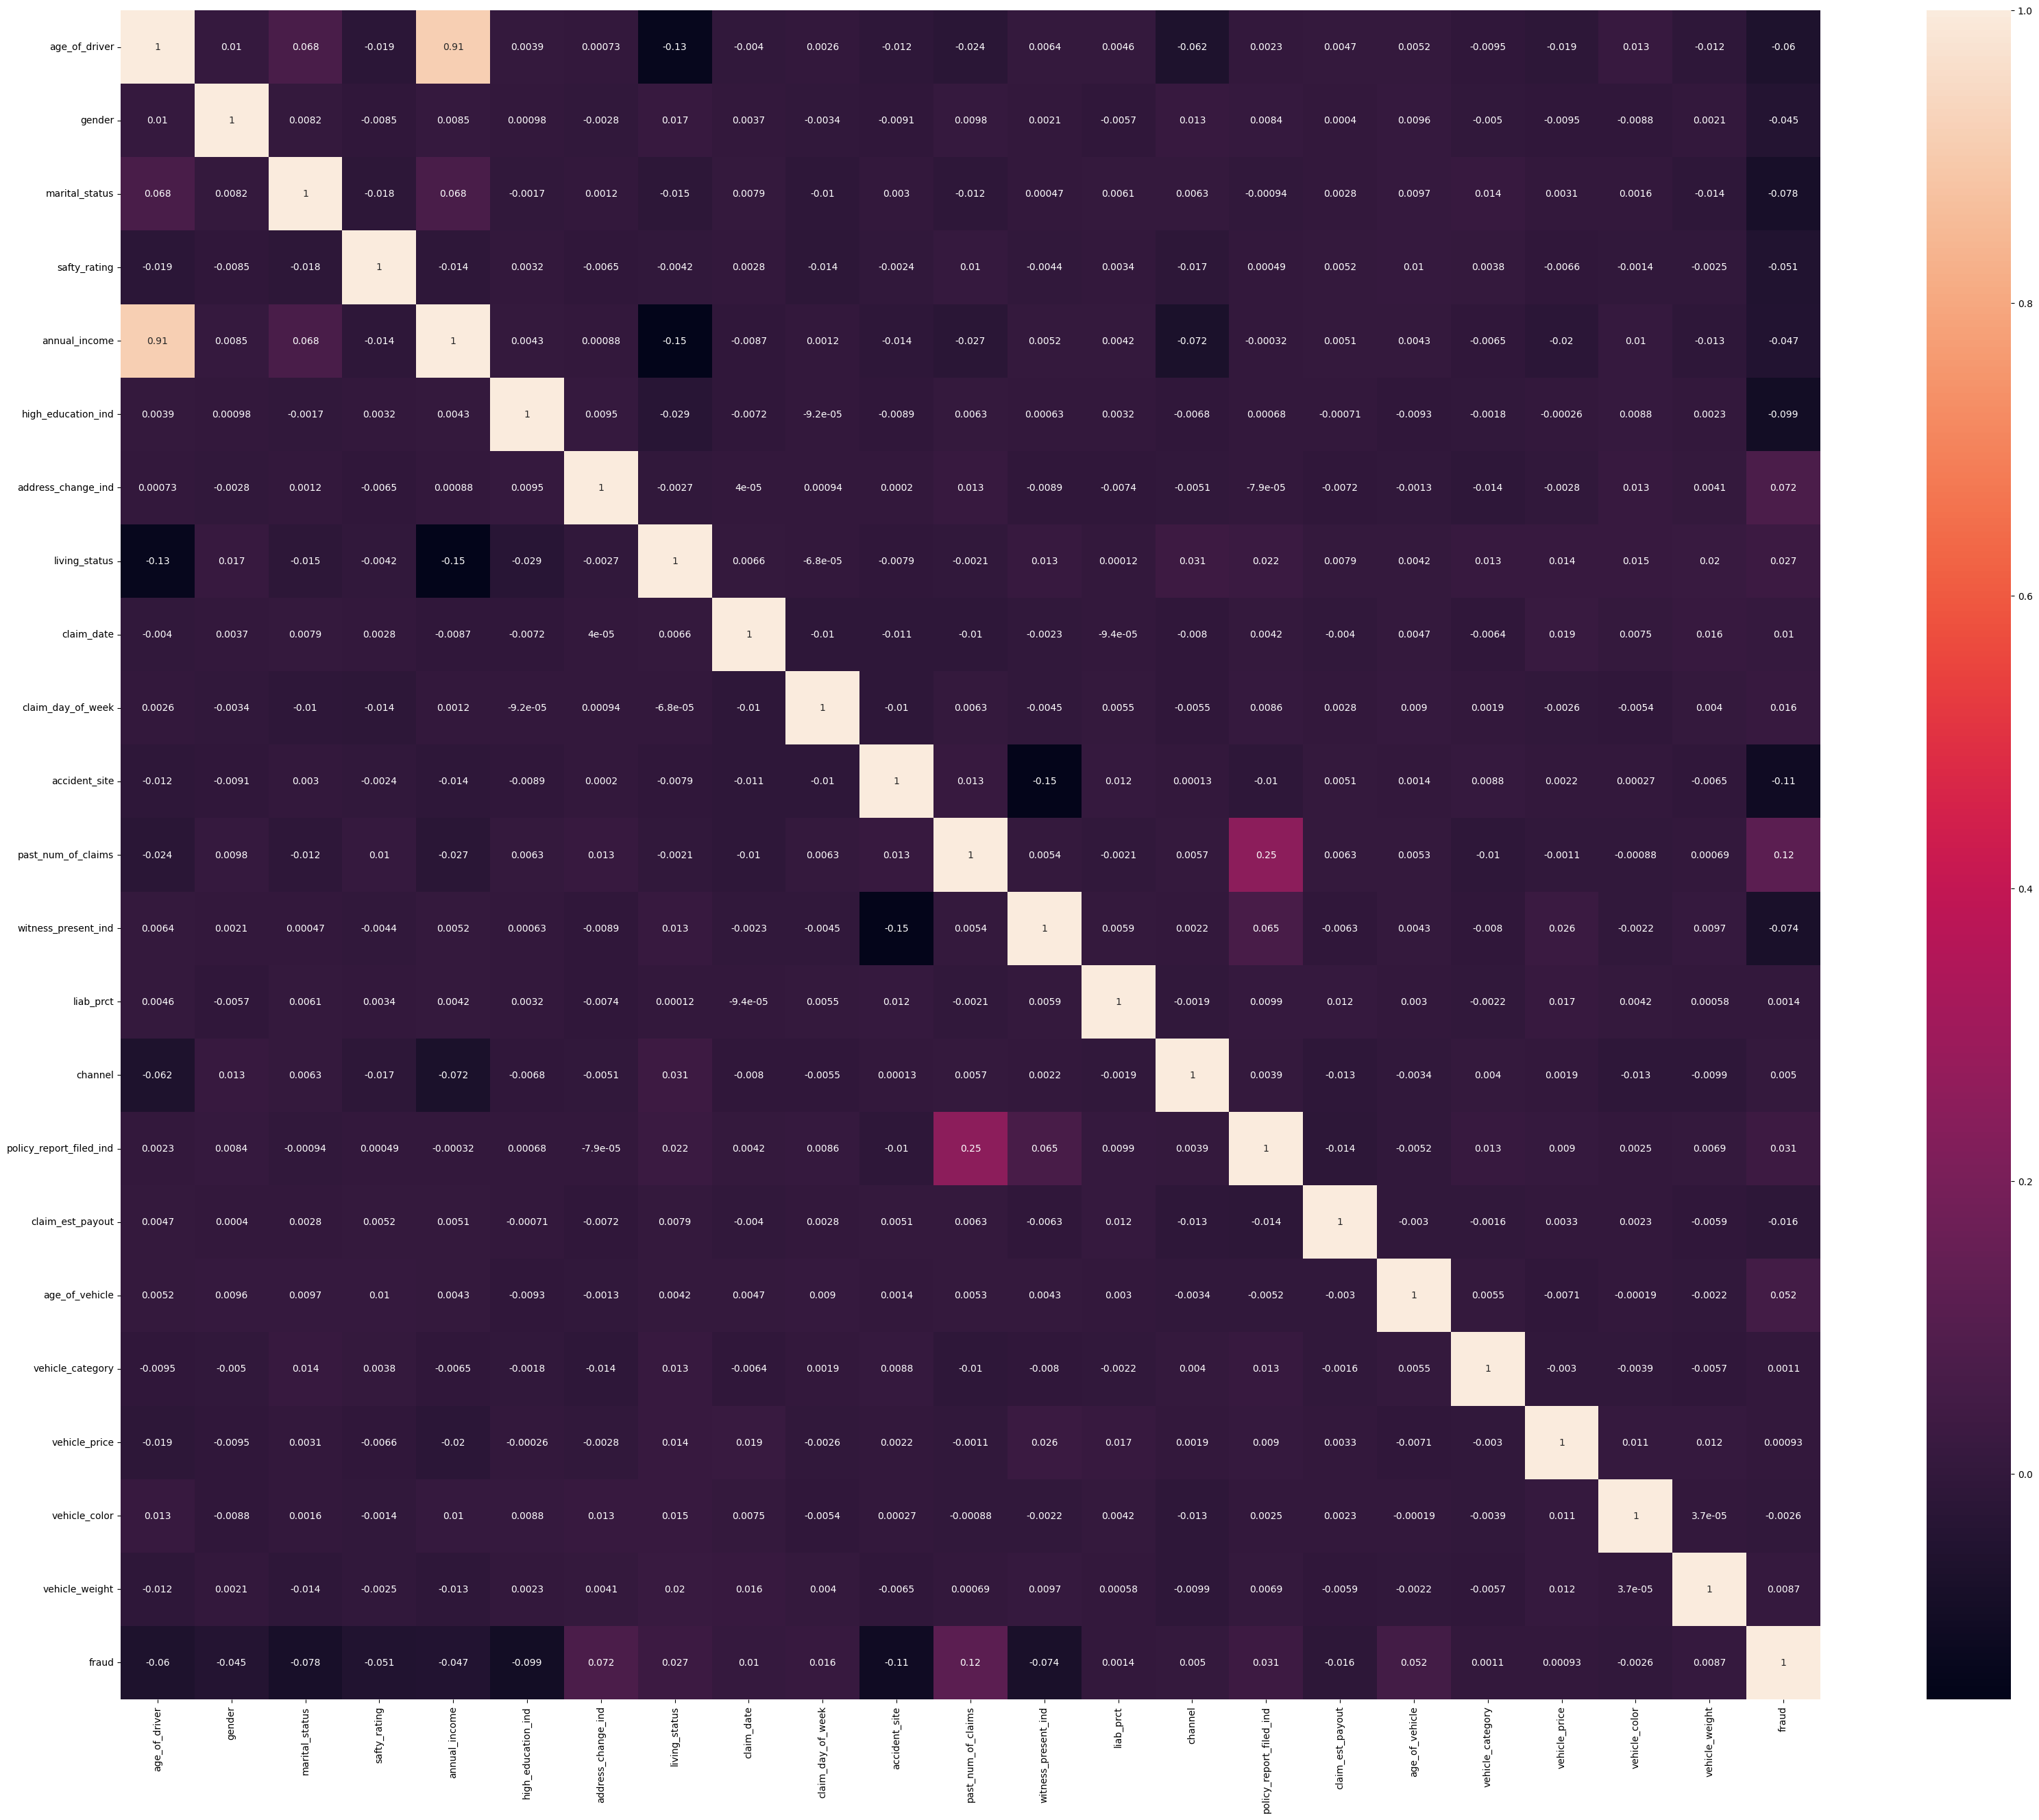

In [28]:
#Correlation Heatmap
plt.figure(figsize=(40,32))
sns.heatmap(df.corr(),annot=True)

# Train Test Split


In [29]:
x=df.drop("fraud",axis=1)
x

,age_of_driver,gender,marital_status,safty_rating,annual_income,high_education_ind,address_change_ind,living_status,claim_date,claim_day_of_week,...,witness_present_ind,liab_prct,channel,policy_report_filed_ind,claim_est_payout,age_of_vehicle,vehicle_category,vehicle_price,vehicle_color,vehicle_weight
0,46,1,1,85,38301,1,1,1,2016,0,...,0,74,0,0,7530.940993,9.0,0,12885.452350,6,16161.33381
1,21,0,0,75,30445,0,1,1,2015,4,...,1,79,1,0,2966.024895,4.0,1,29429.452180,6,28691.96422
2,49,0,0,87,38923,0,1,0,2016,5,...,0,0,0,0,6283.888333,3.0,0,21701.181950,6,22090.94758
3,58,0,1,58,40605,1,0,0,2016,4,...,0,99,0,1,6169.747994,4.0,2,13198.273440,3,38329.58106
4,38,1,1,95,36380,1,0,1,2015,5,...,1,7,0,0,4541.387150,7.0,2,38060.211220,2,25876.56319
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17993,69,1,1,93,42338,1,0,0,15,2,...,0,99,0,0,4806.841803,6.0,2,32144.571850,0,16868.53410
17994,35,0,0,22,35579,1,1,0,2015,1,...,0,94,2,1,4089.794471,3.0,2,9468.510601,1,31500.99689
17995,27,0,1,81,32953,0,1,1,2016,2,...,0,1,1,1,2225.803056,5.0,2,64974.369590,0,44536.25506
17996,52,0,1,86,39519,1,0,0,2015,0,...,1,75,0,1,9560.744844,3.0,0,24983.268110,6,50093.75959


In [30]:
y=df["fraud"]
y  #target column

0        0
1        0
2        1
3        1
4        0
        ..
17993    0
17994    1
17995    0
17996    0
17997    0
Name: fraud, Length: 17836, dtype: int64

In [31]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

# Remove Outliers from Train Data using z-score

In [32]:
from scipy import stats
#Define the column for which you want to remove outliers
selected_col=["age_of_driver","safty_rating","annual_income","claim_est_payout","age_of_vehicle","vehicle_price","vehicle_weight"]
#Calculate the z-score for the selectedcolumns in training data
z_score=np.abs(stats.zscore(x_train[selected_col]))
z_score

,age_of_driver,safty_rating,annual_income,claim_est_payout,age_of_vehicle,vehicle_price,vehicle_weight
13040,1.656155,1.081805,1.909362,0.784467,1.780562,0.302276,0.003007
7575,0.358461,0.682352,0.448576,2.847324,1.331006,1.657016,0.095331
15125,0.946057,1.074387,0.918531,0.826649,0.886496,1.667041,1.170366
8942,0.610288,0.420995,0.660770,0.608390,0.886496,0.008561,0.119386
288,1.152501,0.943708,1.140499,0.920544,0.447033,0.181042,0.282326
...,...,...,...,...,...,...,...
9301,0.313078,0.493753,0.164882,1.055723,0.886496,0.327084,1.096097
13235,0.480962,0.747691,0.341711,0.343466,0.447033,1.033901,0.291768
9923,0.732789,1.074387,0.619195,0.541101,0.002523,0.770138,1.215771
10887,0.229135,1.139726,0.081229,0.468125,1.780562,0.923592,0.506441


In [33]:
#Set a threshold value for outlier detection
threshold=3
#Find the indices of the outliers based on threshold
outlier_indices=np.where(z_score>threshold)[0]
outlier_indices

array([   29,    32,    45,    45,    67,    67,    79,    85,    92,
          93,   100,   148,   173,   188,   229,   229,   242,   263,
         271,   277,   278,   304,   342,   366,   368,   379,   405,
         423,   424,   431,   439,   472,   499,   509,   515,   536,
         541,   542,   544,   580,   587,   590,   592,   611,   617,
         642,   659,   666,   672,   706,   706,   736,   749,   761,
         767,   773,   774,   796,   814,   821,   832,   832,   836,
         845,   847,   854,   855,   855,   885,   888,   904,   936,
         941,   951,   954,   968,   977,   995,  1014,  1038,  1044,
        1058,  1076,  1084,  1096,  1097,  1117,  1138,  1158,  1170,
        1187,  1221,  1223,  1274,  1290,  1300,  1318,  1374,  1389,
        1391,  1403,  1411,  1431,  1445,  1470,  1484,  1490,  1496,
        1496,  1520,  1524,  1551,  1557,  1564,  1625,  1632,  1652,
        1660,  1684,  1689,  1712,  1720,  1733,  1737,  1812,  1838,
        1869,  1916,

In [34]:
#Remove that outliers from the training data
x_train=x_train.drop(x_train.index[outlier_indices])
y_train=y_train.drop(y_train.index[outlier_indices])

# Decision Tree Classifier


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
dtree=DecisionTreeClassifier(class_weight="balanced")
param_grid = {
    'max_depth': [3, 4, 5, 6, 7, 8],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3, 4],
    'random_state': [0, 42]
}
#Perform a grid search with cross validation to find the best HP
gscv=GridSearchCV(dtree,param_grid,cv=5,verbose=3)
gscv.fit(x_train,y_train)


In [36]:
#Print the best hyper parameters
print(gscv.best_params_)

{'max_depth': 8, 'min_samples_leaf': 1, 'min_samples_split': 2, 'random_state': 0}


In [37]:
dtree=DecisionTreeClassifier(max_depth=8,min_samples_leaf=1,min_samples_split=2,random_state=0)
dtree.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=8, random_state=0)

In [38]:
from sklearn.metrics import accuracy_score
y_pred=dtree.predict(x_test)
accu_score=round(accuracy_score(y_test,y_pred),2)
print("AccuracyScore is",accu_score*100,"%")

AccuracyScore is 83.0 %


In [39]:
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,log_loss,jaccard_score
fscore=f1_score(y_test,y_pred,average="micro")
pscore=precision_score(y_test,y_pred,average="micro")
rscore=recall_score(y_test,y_pred,average="micro")
jscore=jaccard_score(y_test,y_pred,average="micro")
Lloss=log_loss(y_test,y_pred)
print("F1 score ",fscore)
print("Precision score ",pscore)
print("Recall score ",rscore)
print("Jaccard score ",jscore)
print("Log Loss",Lloss)


F1 score  0.8307174887892377
Precision score  0.8307174887892377
Recall score  0.8307174887892377
Jaccard score  0.710450623202301
Log Loss 6.101560158920057


In [40]:
imp_df=pd.DataFrame({
    "Feature Name":x_train.columns,
    "Importance":dtree.feature_importances_
})

fi=imp_df.sort_values(by="Importance",ascending=False)
fi2=fi.head(10)
fi2

,Feature Name,Importance
4,annual_income,0.137908
11,past_num_of_claims,0.106637
16,claim_est_payout,0.104215
10,accident_site,0.086982
21,vehicle_weight,0.068807
3,safty_rating,0.068106
5,high_education_ind,0.067187
13,liab_prct,0.061350
2,marital_status,0.055311
12,witness_present_ind,0.054588


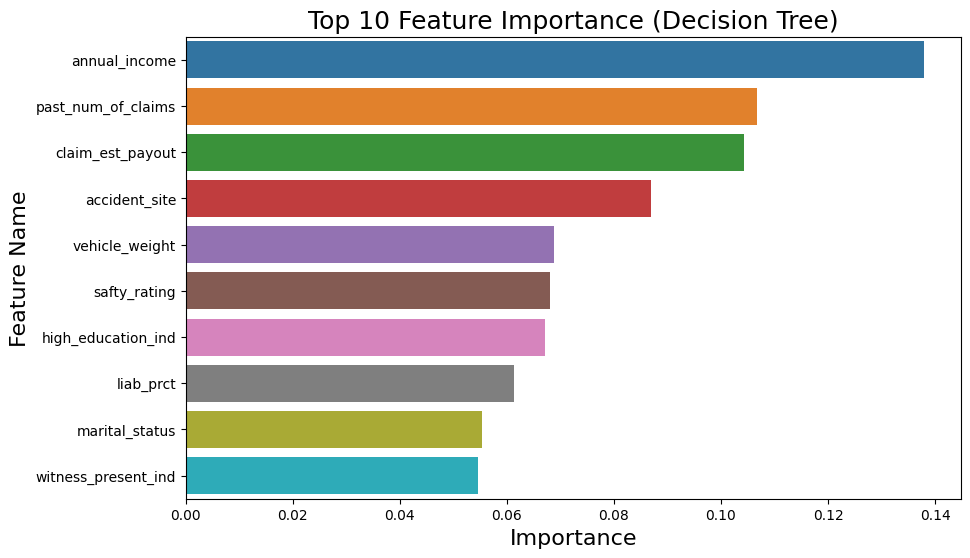

In [41]:
plt.figure(figsize=(10,6))
sns.barplot(data=fi2,x="Importance",y="Feature Name")
plt.title("Top 10 Feature Importance (Decision Tree)",fontsize=18)
plt.xlabel("Importance",fontsize=16)
plt.ylabel("Feature Name",fontsize=16)
plt.show()


In [42]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.9/532.9 kB 7.7 MB/s eta 0:00:00


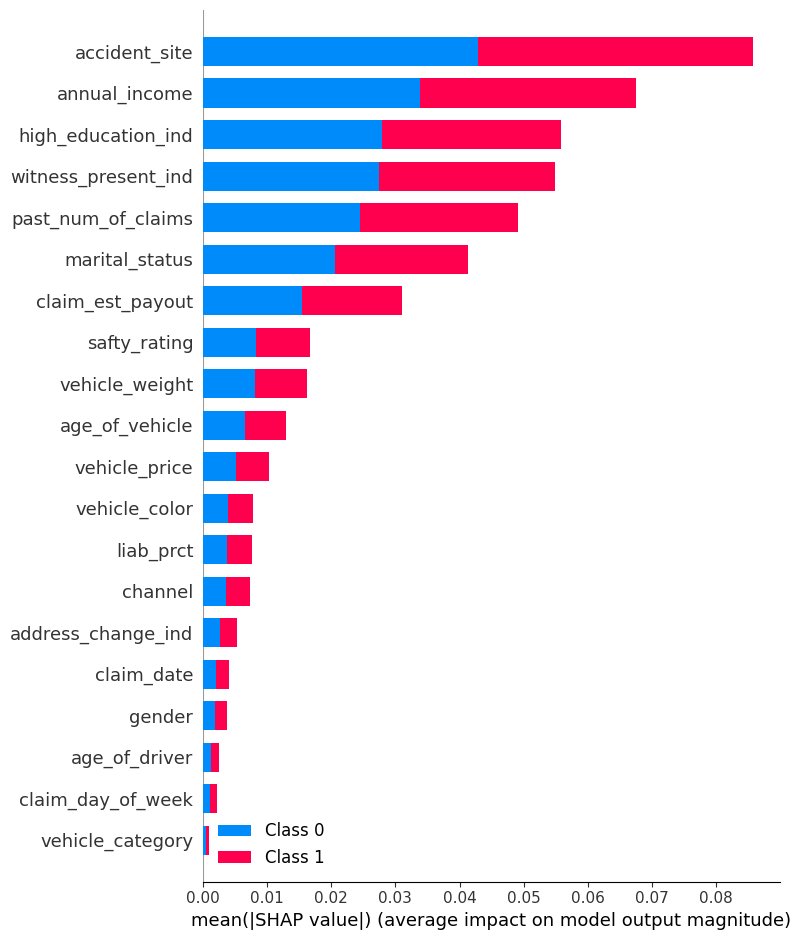

In [43]:
import shap
explainer=shap.TreeExplainer(dtree)
shap_values=explainer.shap_values(x_test)

shap.summary_plot(shap_values,x_test)

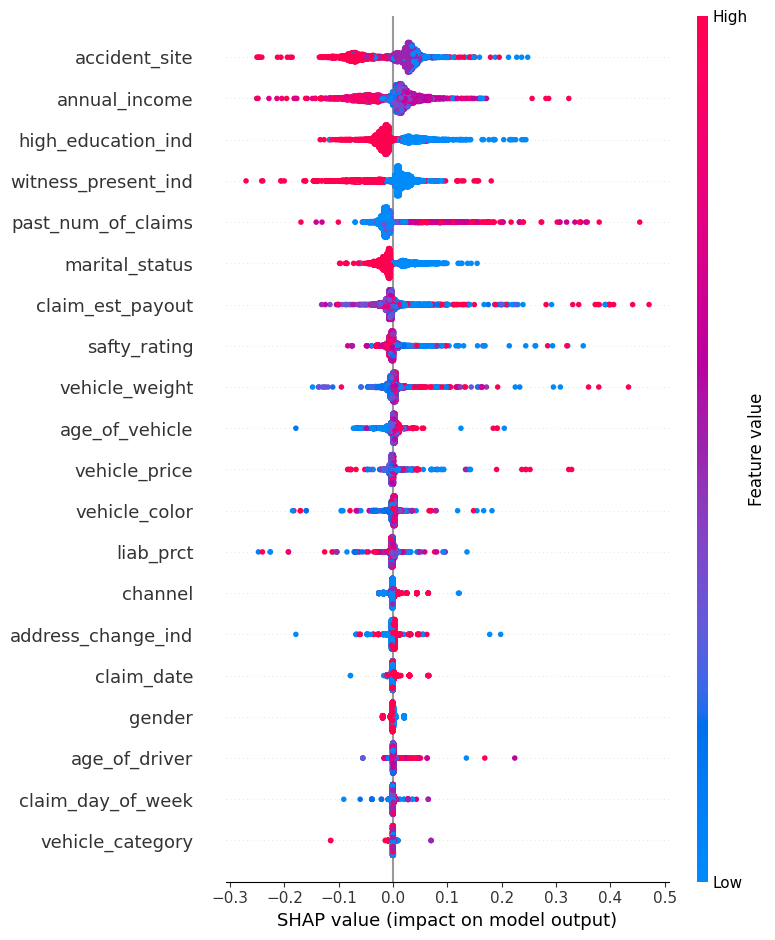

In [44]:
# compute SHAP values

explainer=shap.TreeExplainer(dtree)
shap_values=explainer.shap_values(x_test)

shap.summary_plot(shap_values[1],x_test.values,feature_names=x_test.columns)

In [45]:
shap_values[1]

array([[ 4.41342291e-04,  1.24651612e-03, -1.16415354e-02, ...,
        -2.28092024e-03,  1.29648309e-03,  6.55574598e-04],
       [ 3.52561710e-04,  2.71089462e-03, -1.75680169e-02, ...,
         1.63710853e-03,  1.46067949e-06,  1.62835912e-03],
       [-4.55643156e-04,  1.42176066e-03,  5.18903137e-02, ...,
         1.75432185e-03,  2.49871735e-03,  3.18569336e-03],
       ...,
       [-5.45483557e-05, -2.88769132e-03, -7.53621657e-03, ...,
         1.71328229e-02,  8.56224620e-03,  1.98232446e-02],
       [ 2.79479436e-04,  9.49054766e-04, -4.37247910e-02, ...,
         1.55745671e-03,  1.97148227e-04,  3.81103579e-03],
       [ 1.89367439e-04,  4.40777108e-04, -1.65145424e-02, ...,
        -2.96926009e-04, -1.82232540e-04,  7.74490886e-04]])

Text(0.5, 1.0, '83.0')

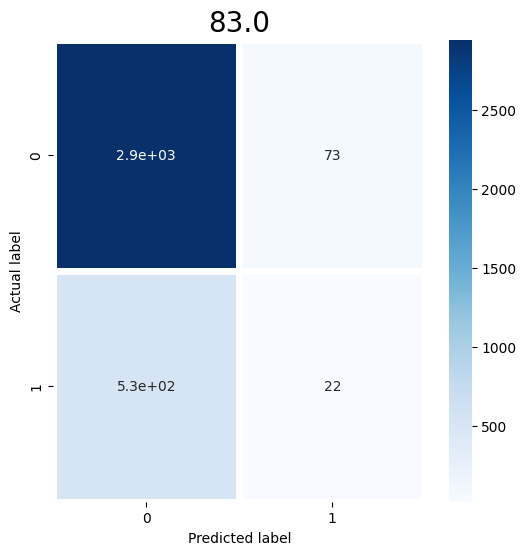

In [46]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(6,6))
sns.heatmap(data=cm,linewidths=5,annot=True,cmap="Blues")
plt.ylabel("Actual label")
plt.xlabel("Predicted label")
plt.title(accu_score*100,size=20)

# Random Forest Classifier

In [47]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
rf=RandomForestClassifier(class_weight="balanced")

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 5, 10],
    'max_features': ['sqrt', 'log2', None],
    'random_state': [0, 42]
}

#Perform a grid search with cross-validation to find the best hyper-param
gscv=GridSearchCV(rf,param_grid,cv=5,verbose=3)
gscv.fit(x_train,y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV 1/5] END max_depth=None, max_features=sqrt, n_estimators=100, random_state=0;, score=0.844 total time=   2.2s
[CV 2/5] END max_depth=None, max_features=sqrt, n_estimators=100, random_state=0;, score=0.844 total time=   2.4s
[CV 3/5] END max_depth=None, max_features=sqrt, n_estimators=100, random_state=0;, score=0.844 total time=   4.1s
[CV 4/5] END max_depth=None, max_features=sqrt, n_estimators=100, random_state=0;, score=0.844 total time=   5.5s
[CV 5/5] END max_depth=None, max_features=sqrt, n_estimators=100, random_state=0;, score=0.844 total time=   3.8s
[CV 1/5] END max_depth=None, max_features=sqrt, n_estimators=100, random_state=42;, score=0.844 total time=   4.2s
[CV 2/5] END max_depth=None, max_features=sqrt, n_estimators=100, random_state=42;, score=0.844 total time=   5.7s
[CV 3/5] END max_depth=None, max_features=sqrt, n_estimators=100, random_state=42;, score=0.844 total time=   4.4s
[CV 4/5] END max_depth=

GridSearchCV(cv=5, estimator=RandomForestClassifier(class_weight='balanced'),
             param_grid={'max_depth': [None, 5, 10],
                         'max_features': ['sqrt', 'log2', None],
                         'n_estimators': [100, 200], 'random_state': [0, 42]},
             verbose=3)

In [48]:
print(gscv.best_params_)

{'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 200, 'random_state': 42}


In [49]:
from sklearn.utils import class_weight
rf=RandomForestClassifier(max_features="sqrt",max_depth=None,n_estimators=200,random_state=42,class_weight="balanced")
rf.fit(x_train,y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=200,
                       random_state=42)

In [60]:
y_pred2=rf.predict(x_test)
accu_score=round(accuracy_score(y_test,y_pred2),2)
print("Accuracy Score",round(accuracy_score(y_test,y_pred2)*100,2),"%")

Accuracy Score 84.56 %


In [61]:
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,log_loss,jaccard_score
fscore=f1_score(y_test,y_pred2,average="micro")
pscore=precision_score(y_test,y_pred2,average="micro")
rscore=recall_score(y_test,y_pred2,average="micro")
jscore=jaccard_score(y_test,y_pred2,average="micro")
Lloss=log_loss(y_test,y_pred2)
print("F1 score ",fscore)
print("Precision score ",pscore)
print("Recall score ",rscore)
print("Jaccard score ",jscore)
print("Log Loss",Lloss)


F1 score  0.8455717488789237
Precision score  0.8455717488789237
Recall score  0.8455717488789237
Jaccard score  0.7324593347899976
Log Loss 5.566158356895614


In [62]:
imp_df=pd.DataFrame({
    "Feature Name":x_train.columns,
    "Importance":rf.feature_importances_
})

fi=imp_df.sort_values(by="Importance",ascending=False)
fi2=fi.head(10)
fi2

,Feature Name,Importance
4,annual_income,0.095062
16,claim_est_payout,0.093071
21,vehicle_weight,0.089984
19,vehicle_price,0.086360
13,liab_prct,0.079648
3,safty_rating,0.079032
0,age_of_driver,0.069482
17,age_of_vehicle,0.053655
9,claim_day_of_week,0.044307
20,vehicle_color,0.044168


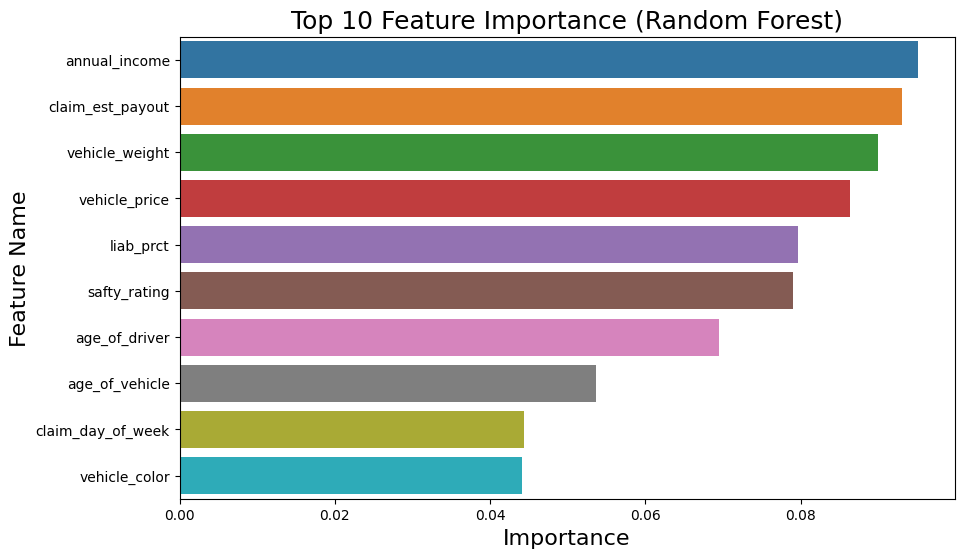

In [63]:
plt.figure(figsize=(10,6))
sns.barplot(data=fi2,x="Importance",y="Feature Name")
plt.title("Top 10 Feature Importance (Random Forest)",fontsize=18)
plt.xlabel("Importance",fontsize=16)
plt.ylabel("Feature Name",fontsize=16)
plt.show()


Text(0.5, 1.0, '85.0')

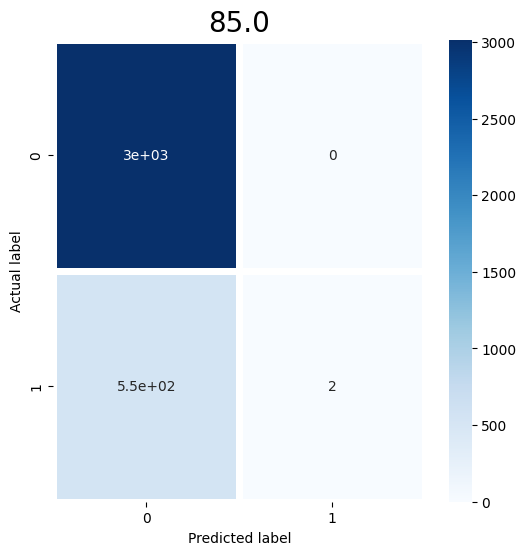

In [64]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred2)
plt.figure(figsize=(6,6))
sns.heatmap(data=cm,linewidths=5,annot=True,cmap="Blues")
plt.ylabel("Actual label")
plt.xlabel("Predicted label")
plt.title(accu_score*100,size=20)

In [64]:
#Completed.........................